#### Import libraries

In [1]:
import pandas as pd
import demoji
import emoji
import re
from PIL import Image, ImageDraw, ImageFont
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from wordcloud import WordCloud
import numpy as np

## Read Dataset

In [23]:
df = pd.read_csv('../Dataset/Annotate_Dataset/comments_annotated.csv')
df

,Comment,Tag_Nalin,Type_Nalin,Tag_Shu,Type_Shu
0,yeah i am😈😈,Non-Hated,amazement,Non-Hated,amazement
1,the story line on some💀,Hated,sarcastic,Hated,sarcastic
2,early 19th century in Haití ☠️☠️☠️,Hated,threat,Hated,threat
3,The same 🤡 who took from a kid’s cancer charit...,Hated,criticism,Hated,sarcastic
4,mass 🔫 and 💀,Hated,threat,Hated,threat
...,...,...,...,...,...
195,👍 😅 I'ma gonna try it on some cuties like you ...,Non-Hated,support,Non-Hated,support
196,Daniiiii oh my😭😭😍😍,Non-Hated,amazement,Non-Hated,amazement
197,👍💯😝💯👍,Non-Hated,admiration,Non-Hated,admiration
198,Honestly this is just cruel 🤣,Non-Hated,humorous,Non-Hated,humorous


## Plot Hate and Non Hate Count

In [28]:
count_hate_nonhate = df['Tag_Nalin'].value_counts()

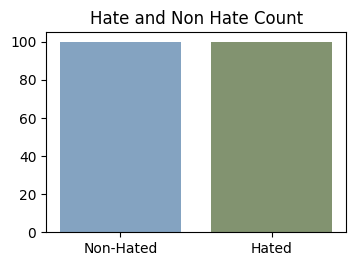

In [29]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(count_hate_nonhate.to_dict().keys()),list(count_hate_nonhate.to_dict().values()),color=[(0.2, 0.4, 0.6, 0.6),(0.3, 0.4, 0.2, 0.7)])
plt.title("Hate and Non Hate Count")
plt.savefig('../plot/hate_nonhate_count.png')
plt.show()

## Plot Classifier Type Count

In [30]:
count_class = df['Type_Nalin'].value_counts()

In [31]:
count_class

sarcastic          30
criticism          21
amazement          17
admiration         16
mocking            15
humorous           14
amusement          13
support            10
concerning          8
discriminatory      7
acknowledgement     7
derogatory          6
threat              6
sweet               6
rebellious          5
disgust             5
excitement          5
accusatory          5
respect             4
Name: Type_Nalin, dtype: int64

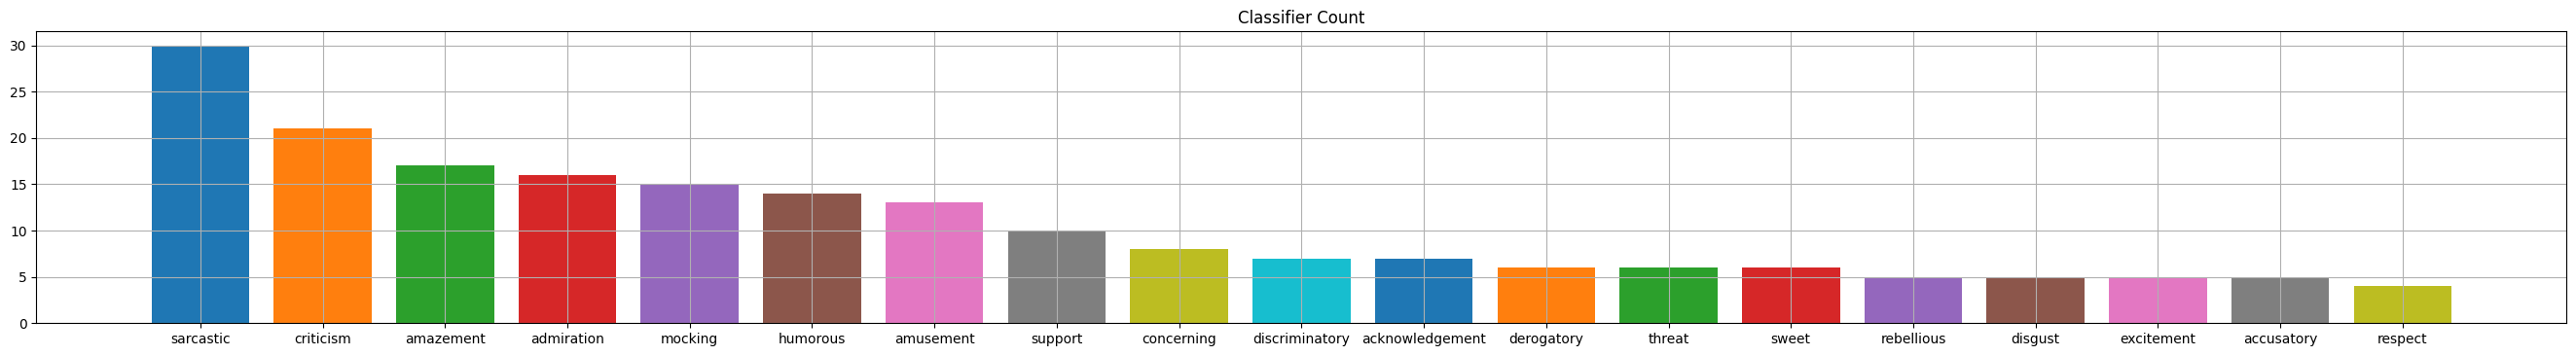

In [32]:
fig = plt.figure(figsize=(26,3))
ax = fig.add_axes([0,0,1,1])
N = 21
cmap = plt.cm.tab10
ax.bar(list(count_class.to_dict().keys()),list(count_class.to_dict().values()),color=cmap(np.arange(len(df)) % cmap.N))
plt.grid()
plt.title('Classifier Count')
plt.savefig('../plot/classifier_count.png')
plt.show()

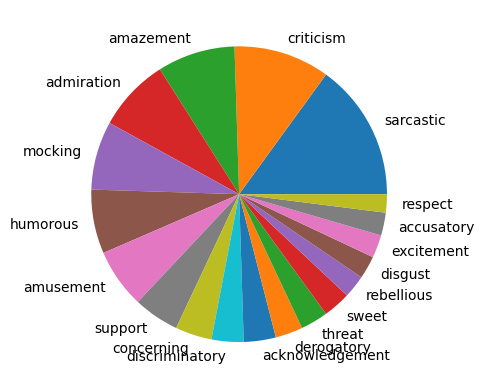

In [46]:
import matplotlib.pyplot as plt
import numpy as np

y = list(count_class.to_dict().values())
mylabels = list(count_class.to_dict().keys())

plt.pie(y, labels = mylabels)
plt.show() 

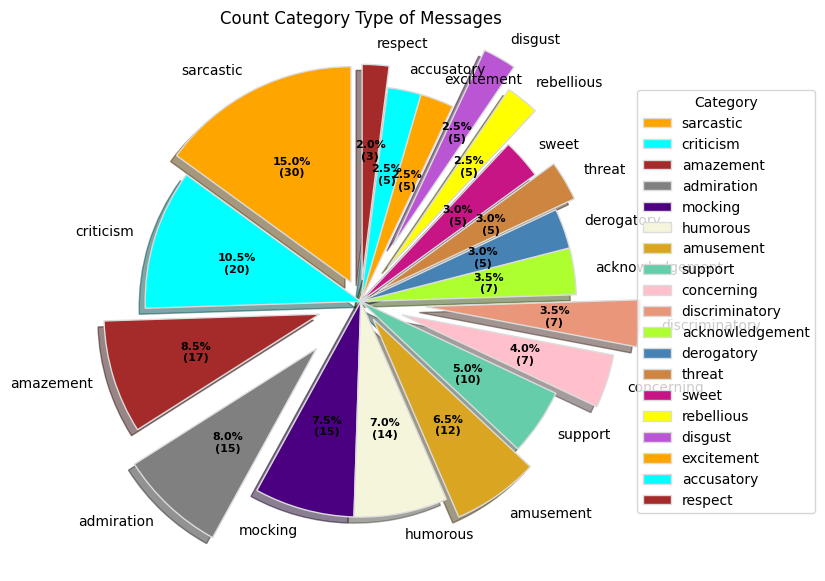

In [65]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
cars = list(count_class.to_dict().keys())

data = list(count_class.to_dict().values())


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige","goldenrod", "mediumaquamarine","pink","darksalmon","greenyellow","steelblue","peru","mediumvioletred","yellow","mediumorchid")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "gainsboro" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = cars,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, cars,
		title ="Category",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Count Category Type of Messages")

# show plot
plt.show()


### Plot overall number of emojis Used Separately in Hated vs Non Hated Text

Filter Emojis that is used in Hated and Non-Hated Comments

In [33]:
df_hate = df[df['Tag_Nalin'] == 'Hated']
df_nonhate = df[df['Tag_Nalin'] == 'Non-Hated']

Convert Hate Comment and Non Hate Comment to string of text

In [34]:
## Hate Text
text_hate = ''
for index, row in df_hate.iterrows():
    text_hate = text_hate + ". " + row["Comment"]
print(text_hate)
## Non Hate Text
text_nonhate = ''
for index, row in df_nonhate.iterrows():
    text_nonhate = text_nonhate + '. ' + row["Comment"]
print(text_nonhate)

. the story line on some💀. early 19th century in Haití ☠️☠️☠️. The same 🤡 who took from a kid’s cancer charity, which had his foundation shutdown due to it. 🥴. mass 🔫 and 💀. why ⬛🟧 will ruin ur life?. A4 paper 🔪. 🤢🤢putin🤢🤢. guess who is 🧠 washed now. thank Macron for this. Go the people of France and 👊. 🐀 🐀 🐀 everywhere 😏. Biden sucks 🍆. USA is full of 🐂💩 ..... 😳…really AMERICA.GOV? 💩. Jordan and Syria 🇯🇴⚔️🇸🇾. some kid at school literally goes “👶🏿🤛 ”. Putin is 💩. this world is sick🤮. I hope he's not just saying these things to garner votes! because politicians are just 😬. Anti-Christian☪️🐺. His eggs are already scrambled 🥴. 🇺🇸TRUMP 2024 🇺🇸 FJB 🖕. Al Roker. What a suck up 🙄. He looks like the bunnies egg😂. Hell No 🗑️👎🏽. Oh yeah China is totally fuc*ed😏. The army is just 🗿🍷. Astaughfurrilah your proud of murder and 💀?. WHO LET BRO COOK 🔥 🔥 🔥 🔥 🔥. WWE Entrance 💀💀💀. 🗣Shotgun 😂😂😂. st. boniface reaction to this:🪓🌳. Crap on a stick 💩. FJB drop dead 💀. Nah bro 💀. I’d like to see him push out a

Find all emojis in hate text and non hate text

In [35]:
# hate text
emojises_hate = re.findall(r'[^\w\⁠s,. ]', text_hate)
# non hate text
emojises_nonhate = re.findall(r'[^\w\⁠s,. ]', text_nonhate)

Filter only emojis used in hate and non hate text

In [36]:
# hate text
filter_emojises_hate = []
for i in emojises_hate:
    if bool(emoji.is_emoji(i)) == True:
        filter_emojises_hate.append(i)
# non hate text
filter_emojises_nonhate = []
for i in emojises_nonhate:
    if bool(emoji.is_emoji(i)) == True:
        filter_emojises_nonhate.append(i)

In [37]:
print(f'The number of emojis used in hate text : {len(emojises_hate)}')
print(f'The number of emojis used in hate text : {len(emojises_nonhate)}')

The number of emojis used in hate text : 413
The number of emojis used in hate text : 392


Count occurrences of each emojis in hate and non hate text

In [38]:
# hate text
emojis_count_hate = {}
for emojis in filter_emojises_hate:
    if emojis not in emojis_count_hate:
        emojis_count_hate[emojis] = 1
    else:
        emojis_count_hate[emojis] += 1
# non hate text
emojis_count_nonhate = {}
for emojis in filter_emojises_nonhate:
    if emojis not in emojis_count_nonhate:
        emojis_count_nonhate[emojis] = 1
    else:
        emojis_count_nonhate[emojis] += 1

In [39]:
## get each label and size for plot in hate text
labels_hate = []
sizes_hate = []
for i in emojis_count_hate:
    labels_hate.append(i)
    sizes_hate.append(emojis_count_hate[i])
## get each label and size for plot in non hate text
labels_nonhate = []
sizes_nonhate = []
for i in emojis_count_nonhate:
    labels_nonhate.append(i)
    sizes_nonhate.append(emojis_count_nonhate[i])

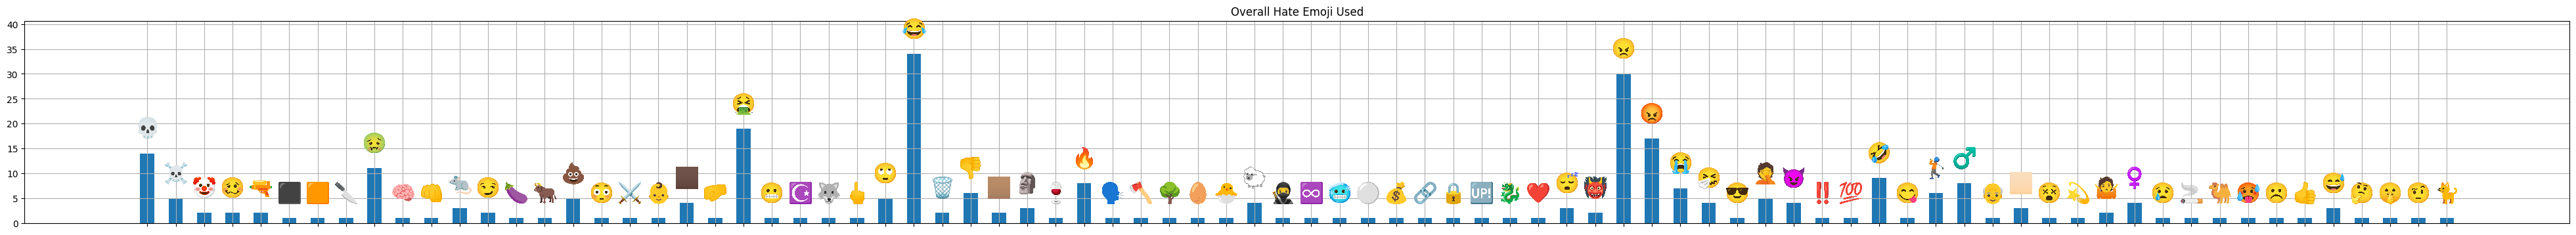

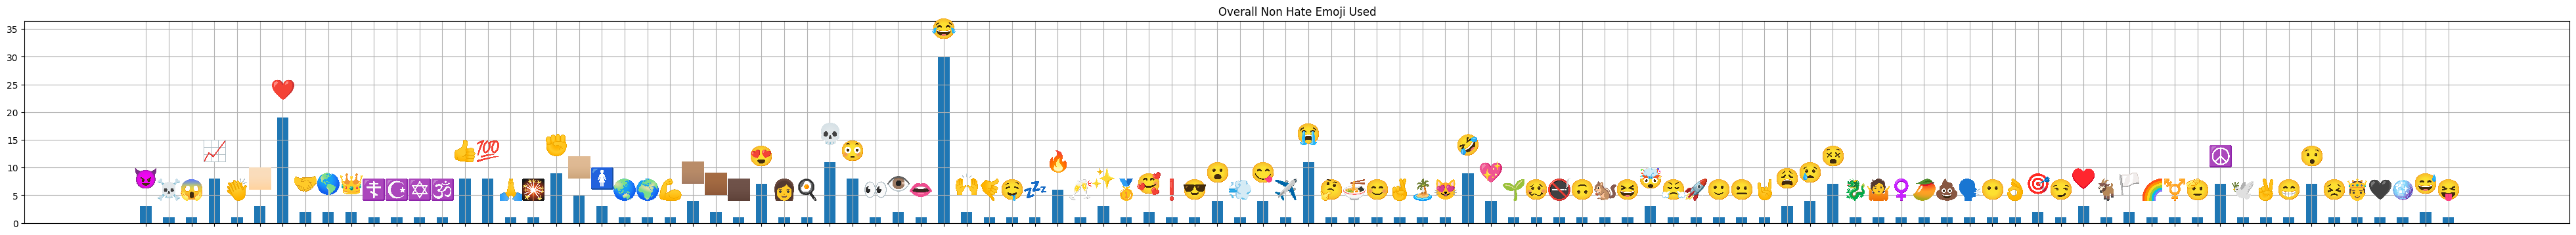

In [40]:

### overall plot bar plot for hate text
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

emjis = labels_hate
values = sizes_hate

fig, ax = plt.subplots(figsize=(50,4))
ax.bar(range(len(emjis)), values, width=0.5,align="center")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+5))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)
plt.grid()
plt.title("Overall Hate Emoji Used")
plt.savefig('../plot/hate_emojis_bar.png')

### overall bar plot for non hate text
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

emjis = labels_nonhate
values = sizes_nonhate

fig, ax = plt.subplots(figsize=(50,4))
ax.bar(range(len(emjis)), values, width=0.5,align="center")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+5))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)
plt.grid()
plt.title("Overall Non Hate Emoji Used")
plt.savefig('../plot/nonhate_emojis_bar.png')

## Plot see the most 10 used in hate text and non hate text

In [41]:
## Sort the most occurrence emoji used in hate text
sorted_hate = sorted(emojis_count_hate.items(), key=lambda x:x[1], reverse=True)
sorted_emojis_count_hate = dict(sorted_hate)
print(sorted_emojis_count_hate)
## Sort the most occurrence emoji used in non hate text
sorted_nonhate = sorted(emojis_count_nonhate.items(), key=lambda x:x[1], reverse=True)
sorted_emojis_count_nonhate = dict(sorted_nonhate)
print(sorted_emojis_count_nonhate)

{'😂': 34, '😠': 30, '🤮': 19, '😡': 17, '💀': 14, '🤢': 11, '🤣': 9, '🔥': 8, '♂': 8, '😭': 7, '👎': 6, '🏌': 6, '☠': 5, '💩': 5, '🙄': 5, '🤦': 5, '🏿': 4, '🐑': 4, '🤧': 4, '😈': 4, '♀': 4, '🐀': 3, '🗿': 3, '😴': 3, '🏻': 3, '😅': 3, '🤡': 2, '🥴': 2, '🔫': 2, '😏': 2, '🗑': 2, '🏽': 2, '👹': 2, '🤷': 2, '⬛': 1, '🟧': 1, '🔪': 1, '🧠': 1, '👊': 1, '🍆': 1, '🐂': 1, '😳': 1, '⚔': 1, '👶': 1, '🤛': 1, '😬': 1, '☪': 1, '🐺': 1, '🖕': 1, '🍷': 1, '🗣': 1, '🪓': 1, '🌳': 1, '🥚': 1, '🐣': 1, '\U0001f977': 1, '♾': 1, '🥶': 1, '⚪': 1, '💰': 1, '🔗': 1, '🔒': 1, '🆙': 1, '🐉': 1, '❤': 1, '😎': 1, '‼': 1, '💯': 1, '😋': 1, '👴': 1, '😵': 1, '💫': 1, '😢': 1, '🚬': 1, '🐫': 1, '🥵': 1, '☹': 1, '👍': 1, '🤔': 1, '🤫': 1, '🤨': 1, '🐈': 1}
{'😂': 30, '❤': 19, '💀': 11, '😭': 11, '✊': 9, '🤣': 9, '📈': 8, '👍': 8, '💯': 8, '😳': 8, '😍': 7, '😵': 7, '☮': 7, '😯': 7, '🔥': 6, '🏼': 5, '🏽': 4, '😮': 4, '😋': 4, '💖': 4, '😢': 4, '😈': 3, '🏻': 3, '🚺': 3, '✨': 3, '🤯': 3, '😩': 3, '♥': 3, '🤝': 2, '🌎': 2, '👑': 2, '🏾': 2, '👁': 2, '🙌': 2, '🥰': 2, '🎯': 2, '🏳': 2, '😅': 2, '☠': 1, '😱': 1, '👏'

In [42]:
## set label, value most 5 emoji in hate text
labels_hate = []
values_hate = []
for k in list(sorted_emojis_count_hate)[:10]:
    labels_hate.append(k), values_hate.append(sorted_emojis_count_hate[k])
## set label, value in  most 5 emoji in non hate text
labels_nonhate = []
values_nonhate = []
for k in list(sorted_emojis_count_nonhate)[:10]:
    labels_nonhate.append(k), values_nonhate.append(sorted_emojis_count_nonhate[k])

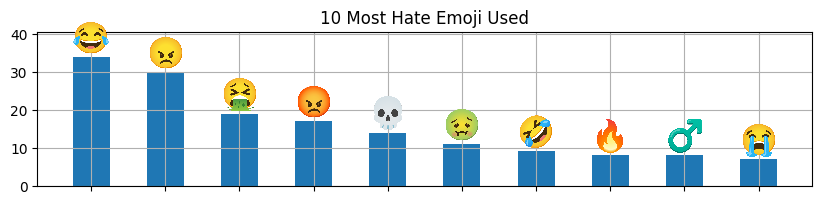

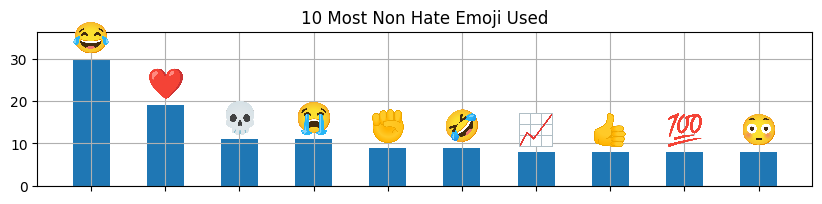

In [43]:
### overall plot bar plot for most 5 hate text
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

emjis = labels_hate
values = values_hate

fig, ax = plt.subplots(figsize=(10,2))
ax.bar(range(len(emjis)), values, width=0.5,align="center")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+5))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)
plt.grid()
plt.title("10 Most Hate Emoji Used")
plt.savefig('../plot/10_most_hate_emojis_bar.png')

### overall plot bar plot for most 5 non hate text
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

emjis = labels_nonhate
values = values_nonhate

fig, ax = plt.subplots(figsize=(10,2))
ax.bar(range(len(emjis)), values, width=0.5,align="center")
ax.set_xticks(range(len(emjis)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+5))

for i, e in enumerate(emjis):
    offset_image([i,values[i]+5], e, ax)
plt.grid()
plt.title("10 Most Non Hate Emoji Used")
plt.savefig('../plot/10_most_nonhate_emojis_bar.png')

## Plot 10 emojis used both in hate and non hate text 

In [25]:
## find emojis that use in hate also in non hate
labels_10_most = []
values_10_most_hate = []
values_10_most_nonhate = []
for i in range(len(labels_hate)):
    if labels_hate[i] in labels_nonhate:
      labels_10_most.append(labels_hate[i])
      values_10_most_hate.append(values_hate[i])
      values_10_most_nonhate.append(values_nonhate[i])

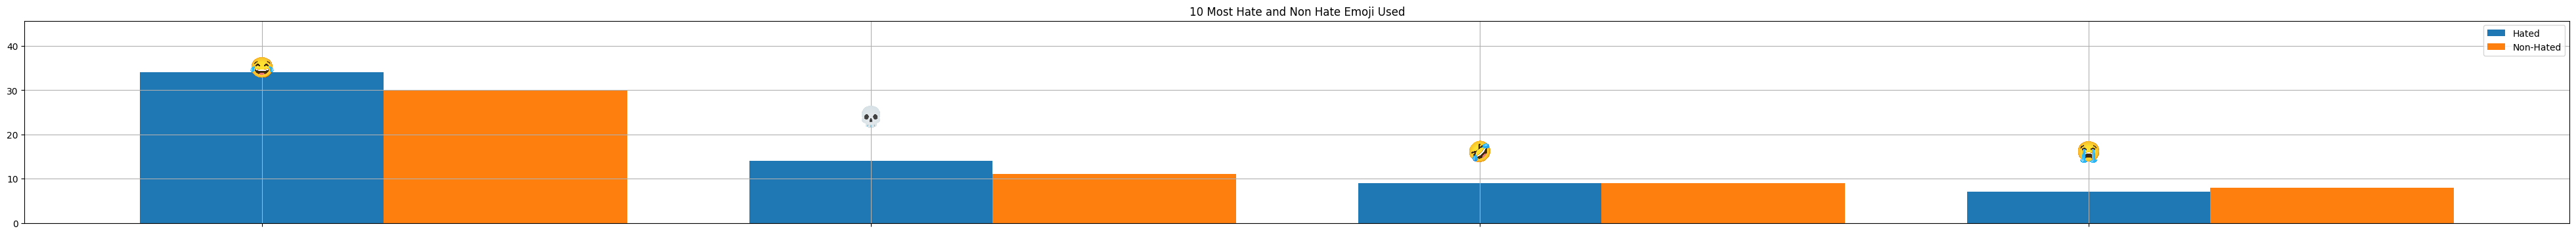

In [26]:
def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

emjis1 = labels_10_most
emjis2 = labels_10_most
values1 = values_10_most_hate
values2 = values_10_most_nonhate

fig, ax = plt.subplots(figsize=(50,4))
ax.bar(range(len(emjis1)), values1, width=0.4,align="center",label="Hated")
ax.bar([x + 0.4 for x in range(len(emjis2))], values2, width=0.4, align="center", label="Non-Hated")
ax.set_xticks(range(len(emjis1)))
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+10))
ax.legend()


for i, e in enumerate(emjis1):
    offset_image([i,values[i]+5], e, ax)
plt.grid()
plt.title("10 Most Hate and Non Hate Emoji Used")
plt.savefig('../plot/10_most_hate_nonhate_emojis_bar.png')

## Plot wordcloud for hate and non hate text

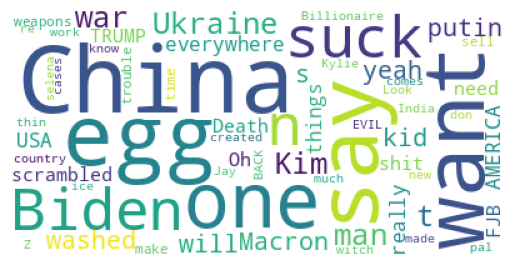

In [27]:
wordcloud = WordCloud(
                background_color ='white',
                min_font_size = 10).generate(text_hate)
# plot the WordCloud image                      
plt.figure(figsize = (5, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
wordcloud.to_file('../plot/hate_wordcloud.png')

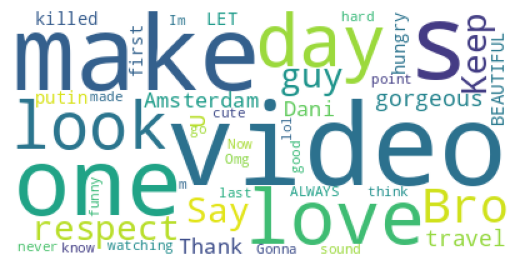

In [28]:
wordcloud = WordCloud(
                background_color ='white',
                min_font_size = 10).generate(text_nonhate)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
wordcloud.to_file('../plot/nonhate_wordcloud.png')